<a href="https://colab.research.google.com/github/Tran-Thu-Le/share/blob/main/ML/Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seminar: Lasso problem

**Speaker:** [Tran Thu Le][1]

University of Rennes 1, France

Rennes, France, 2021-09-06

[1]: https://github.com/Tran-Thu-Le

## Abstract

[Lasso][a] is an important problem in statistics. Its name is the abreviation of "least absolute shrinkage and selection operator" that performs both variable selection, regularization and sparsity.

In this note, we motivate the Lasso problem and its characteristics and introduce  a solving method called ISTA.

In a nutshell, Lasso problem is defined as follows
$$\min_{x\in \mathbb R^n} \frac{1}{2}||y-Ax||_2^2+\lambda||x||_1$$
where $y\in \mathbb R^m$, $A\in \mathbb R^{m\times n}$ and $\lambda>0$.

The Lasso is closely related to [Basis pursuit denoising][b] a crucial problem in image processing and signal processing.

[a]: https://en.wikipedia.org/wiki/Lasso_(statistics)
[b]: https://en.wikipedia.org/wiki/Basis_pursuit_denoising



## Motivation

**Model.** We are given an "observation" $y\in \mathbb R^m$ which is a noisy combination of  a **few** "atoms" $a_i\in \mathbb R^m$ with positive coefficients $x_i\in \mathbb R$ for $i=1,...,n$, i.e.
    $$y=x_1a_1 + ... + x_na_n +\varepsilon,$$
    where $\varepsilon\in \mathbb R^m$ represents the noise.

**Question.** Assume that $y$ and $a_i$, $i=1,...,n$ were known. The question is how to recover $x_i$, $i=1,..., n$.

**Challenge.** The problem is not easy even in the case $\varepsilon=0_{\mathbb R^m}$ since we usually have $m\neq n$.

#### Example 1. Ordinary Least Square



Assume that $y=xa+\varepsilon$ for $y, a, \varepsilon\in \mathbb R^m$ and $x>0$. The relation between $y$ and $a$ is represented by the following plot. Our question is how to find the "slope" $x$.

A popular approach for this problem is to solve the following problem, called [Ordinary Least Square (OLS)][2] problem,
$$\min_{x\in \mathbb R, x>0} ||y-xa||_2^2$$

[2]: https://en.wikipedia.org/wiki/Ordinary_least_squares

**Application.** OLS problem is one of the main problem in statistics.

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_theme()
from math import pi

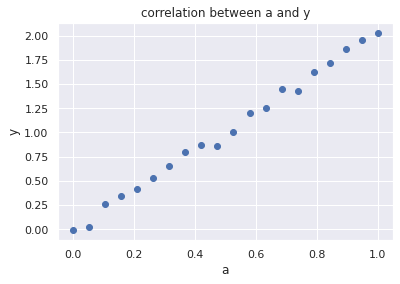

In [ ]:
a = np.linspace(0., 1., 20) 
noise = 0.2*(np.random.rand(20)-0.5)
y = 2*a+noise
plt.scatter(a, y)
plt.title("correlation between a and y")
plt.xlabel("a")
plt.ylabel("y")
plt.show()

#### Example 2. Fourier series

**Model.** Let $a_k\in \mathbb R^m$ the $m$-discretize of function $\sin(k2\pi. t)$ for $t\in [0, 1]$. Now, assume that 
$$y = a_2+a_3 +\varepsilon$$

The following plot displays the graphs of $y, a_2$ and $a_3$ wrt $m=100$.

Notice that the problem of decomposing $y$ into sine functions is indeed the Fourier expansion if $\varepsilon=0$.

For $\varepsilon\neq 0$, the Fourier expansion is unapplicable.

**Application.** This problem is one of the main problem in Signal processing.

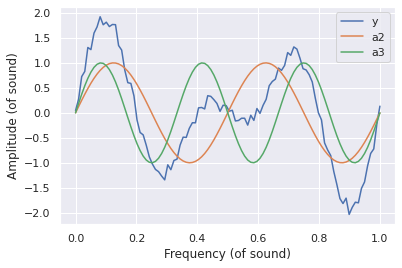

In [ ]:
m=100
t = np.linspace(0., 1., m)
noise = 0.3*(np.random.rand(m)-0.5)
a2 = np.sin(t*2*pi*2)
a3 = np.sin(t*2*pi*3)
y = a2 + a3 + noise
plt.plot(t, y, label="y")
plt.plot(t, a2, label="a2")
plt.plot(t, a3, label="a3")
plt.legend()
plt.xlabel("Frequency (of sound)")
plt.ylabel("Amplitude (of sound)")
plt.show()

## Lasso and other solution approachs

**Solution approach 1 (naive):** is to consider the [Multiple Linear Regression (MLR)][3] problem,
$$\min_{ x\in \mathbb R^m} ||y-\sum_{i=1}^n x_ia_i||_2^2$$

However, in pratice this problem is uasually [ill-pose][4], i.e., its optimal solution can be
- not unique
- unstable wrt noise

To avoid the ill-poseness of MLR, we may use [Tikhonov regularizations][5] using $\ell_0, \ell_2 and \ell_1$.


**$\ell_0$ regularization (extremely difficult):** is to consider $\ell_0$ penalization
$$\min_{ x\in \mathbb R^m} ||y-\sum_{i=1}^n x_ia_i||_2^2 + \lambda ||x||_0$$
where $\lambda>0$ and $||x||_0$ counting the non-zero entries, a.k.a Hamming distance. This problem is extremely diffcult since it is non-convex and even NP-hard. 

**Ridge: $\ell_2$ regularization (quite good):** is to consider $\ell_2$ penalization
$$\min_{ x\in \mathbb R^m} ||y-\sum_{i=1}^n x_ia_i||_2^2 + \lambda ||x||_2$$
This problem is convex and have an explicit solution. However, in practice most of components of $x$ are non-zero while we wish most of them equal to $0$.

**Lasso: $\ell_1$ regularization (good):** is to consider $\ell_1$ penalization
$$\min_{ x\in \mathbb R^m} ||y-\sum_{i=1}^n x_ia_i||_2^2 + \lambda ||x||_1$$
Although this problem is non-smooth but convex, thus has many solving methods.

**Note.** If $m$ or $n$ is fixed, then Lasso can be solve in polynomial time. However, it is not to known to be NP-hard or not in general.





[3]: https://en.wikipedia.org/wiki/Linear_regression#*Simple_and_multiple_linear_regression*
[4]: https://en.wikipedia.org/wiki/Well-posed_problem
[5]: https://en.wikipedia.org/wiki/Tikhonov_regularization

### Advantages of Lasso


The $\ell_1$ induces the spasity, thus perform both the feature selection and spasity.


![Lasso and Ridge](https://scientistcafe.com/ids/images/LassoRidge.png)

**Dual problem of Lasso.**
$$\max_{u\in D} \frac{1}{2}||y||_2^2-\frac{1}{2}||y-u||_2^2$$

where $D=\{ u\in \mathbb R^m: u^Ta_i\leq \lambda, \forall i=1,...,n\}$. Hence the dual problem of Lasso is actually the projection of $y$ onto convex set $D$, thus has a unique dual solution, say $u^*$.

**Optimality condition.** $x^*\in \mathbb R^n$ is an optimal solution (not unique) of Lasso iff there exists $\hat u\in \mathbb R^m$ such that
$$\begin{cases}
(\hat u)^Ta_i=\lambda, \text{ if } x^*_i>0,\\
(\hat u)^Ta_i<\lambda, \text{ if } x^*_i=0.
\end{cases}
$$
Moreover, $\hat u$ is the dual optimal solution.

## ISTA - a fast solving method for Lasso

The idea of solving Lasso contains two main steps

**Proximal Gradient descent method**

Assume that we want to minimize a convex function $f$ and we start at position $x^{(k)}$. Now if we may contruct another convex function $g$ depending on $x^{(k)}$ such that
- $g(x^{(k)})=f(x^{(k)})$
- $g(x)\geq f(x)$ for all $x$

Now, if we choose
$$x^{(k+1)}=\arg\min_{x} g(x)$$
then we have 
$$f(x^{(k)})=g(x^{(k)})\geq g(x^{(k+1)})\geq f(x^{(k+1)})$$
Thus, $\{x^{(k)}\}_k$ forms a decreasing sequence and actually converges to the optimal solution.



Choose $f(x)=\frac{1}{2}||y-Ax||_2^2+\lambda||x||_1$

$$\begin{align}
f(x) & =\frac{1}{2}||y-Ax^{(k)}+(Ax^{(k)}-Ax)||_2^2+\lambda||x||_1\\
& =\frac{1}{2}||y-Ax^{(k)}||_2^2+\langle y-Ax^{(k)}, A(x^{(k)}-x)\rangle 
+ \frac{1}{2} ||A(x^{(k)}-x)||_2^2+\lambda||x||_1\\
& \leq \frac{1}{2}||y-Ax^{(k)}||_2^2+\langle A^T( y-Ax^{(k)}), x^{(k)}-x\rangle 
+ \frac{1}{2} L ||x^{(k)}-x||_2^2+\lambda||x||_1\\
& = \frac{L}{2}||x^{(k)}+\frac{1}{L}A^T(y-Ax^{(k)})-x||_2^2+\lambda||x||_1+C\\
\end{align}$$
where $L$ is the operator norm of $A$ (the largest eigenvalue of $A^TA$).

Let $v^{(k)}:=x^{(k)}+\frac{1}{L}A^T(y-Ax^{(k)})$ the gradient update, then to minimize $f$ we may minimize the function $g$ defined as follows
$$g(x)=\frac{1}{2}||x-v^{(k)}||_2^2+\frac{\lambda}{L}||x||_1$$
This particular problem is the so-called proximal problem. To minimize $g$, it is sufficient to minimize coordinate-wise, i.e. w.l.o.g we assume that $x$ and $v^{(k)}$ are one-dimensional.

The optimal solution for this proximal is 
$$x^{(k+1)}=\arg\min_{x\geq 0} g(x)= \max( v^{(k)}-\frac{\lambda}{L}, 0)$$



In [1]:
def ISTA(y, A, lbd, max_iters=100):
    x = np.zeros(A.shape[1])
    sing, _ = np.linalg.eig(A.T @ A)
    L = np.max(np.real(sing))
    x_list = [x] 

    for i in range(max_iters):
        v = x + (1./ L) * (A.T @ (y - A @ x))
        x = (v - (lbd/L)).clip(min=0)
        x_list += [x]

    return x, x_list

def dic(x, t, w):
    diff = x.reshape(-1, 1) - t.reshape(1, -1)
    gauss = np.power(2, -diff**2/w**2)
    norm = np.sqrt((gauss**2).sum(0))
    return gauss/norm

def obj_val(y, A, lbd, x):
    a = 0.5 * np.linalg.norm(y-A @ x, ord=2)**2
    b = lbd * np.linalg.norm(x, ord=1)
    return a+b

def test():
    # 1. setup
    m, n = 100, 80
    x = np.linspace(0., 1., m)
    t = np.linspace(0., 1., n)
    w = 0.05 
    A = dic(x, t, w) 
    indexes = [n//3, 2*n//3]
    coeffs = np.array([1., 1.])
    y = A[:, indexes] @ coeffs
    noise = 0.02*(np.random.rand(m)-0.5)
    y = y+noise
    lbd = 0.1

    # 2. ISTA 
    x_hat, x_list = ISTA(y, A, lbd, max_iters=50) 

    # 3. compare y and recovered y_hat 
    y_hat = A @ x_hat
    plt.plot(x, y, label="y")
    plt.plot(x, y_hat, label="y_hat")
    plt.legend()
    plt.show()

    # 4. the cost value 
    vals = [obj_val(y, A, lbd, x_) for x_ in x_list]
    plt.plot(vals, label="objective value vs iterations")
    plt.legend()
    plt.show()

    # 5. the speed of convergence
    opt_val = vals[-1]
    plt.plot([val-opt_val for val in vals], label="precision vs iterations")
    plt.yscale("log")
    plt.legend()
    plt.show()


test()

NameError: ignored